# Plot AAPL using matplotlib

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/AAPL.csv')
df

,date,close,open,high,low,volume,change
0,2004-01-02,0.38,0.38,0.39,0.38,144.67M,0.00
1,2004-01-05,0.40,0.38,0.40,0.38,395.37M,5.26
2,2004-01-06,0.39,0.40,0.40,0.39,509.66M,-2.50
3,2004-01-07,0.40,0.39,0.41,0.39,586.96M,2.56
4,2004-01-08,0.42,0.41,0.42,0.40,460.33M,5.00
...,...,...,...,...,...,...,...
4849,2023-04-06,164.66,162.43,164.96,162.00,45.39M,0.55
4850,2023-04-10,162.03,161.42,162.03,160.08,47.03M,-1.60
4851,2023-04-11,160.80,162.35,162.36,160.51,46.31M,-0.76
4852,2023-04-12,160.10,161.22,162.06,159.78,49.40M,-0.44


In [7]:
df["date"] = pd.to_datetime(df['date'])
df

,date,close,open,high,low,volume,change
0,2004-01-02,0.38,0.38,0.39,0.38,144.67M,0.00
1,2004-01-05,0.40,0.38,0.40,0.38,395.37M,5.26
2,2004-01-06,0.39,0.40,0.40,0.39,509.66M,-2.50
3,2004-01-07,0.40,0.39,0.41,0.39,586.96M,2.56
4,2004-01-08,0.42,0.41,0.42,0.40,460.33M,5.00
...,...,...,...,...,...,...,...
4849,2023-04-06,164.66,162.43,164.96,162.00,45.39M,0.55
4850,2023-04-10,162.03,161.42,162.03,160.08,47.03M,-1.60
4851,2023-04-11,160.80,162.35,162.36,160.51,46.31M,-0.76
4852,2023-04-12,160.10,161.22,162.06,159.78,49.40M,-0.44


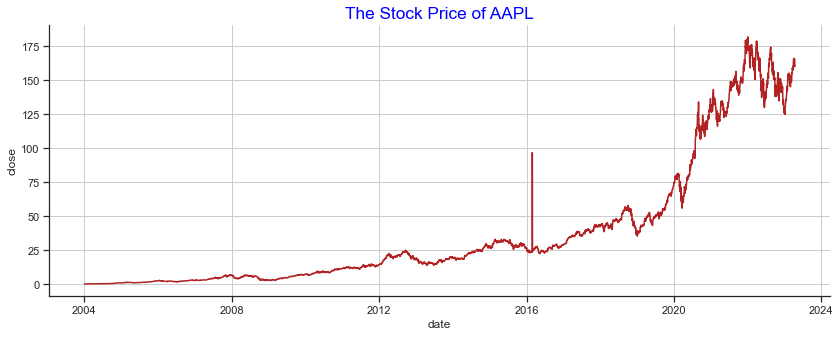

In [8]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x="date",y='close',color='firebrick')
sns.despine()
plt.title("The Stock Price of AAPL",size='x-large',color='blue')
plt.grid()

# Plot AAPL using plotly

In [9]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(name="close",
                         x=df["date"],
                         y=df["close"],
                         mode="lines"))
fig.update_layout(title_text="The Stock Price of AAPL",
                  title_x=0.5)
fig.update_xaxes(title='date')
fig.update_yaxes(title='close')
fig.show()

# Draw Multiple stocks using matplotlib

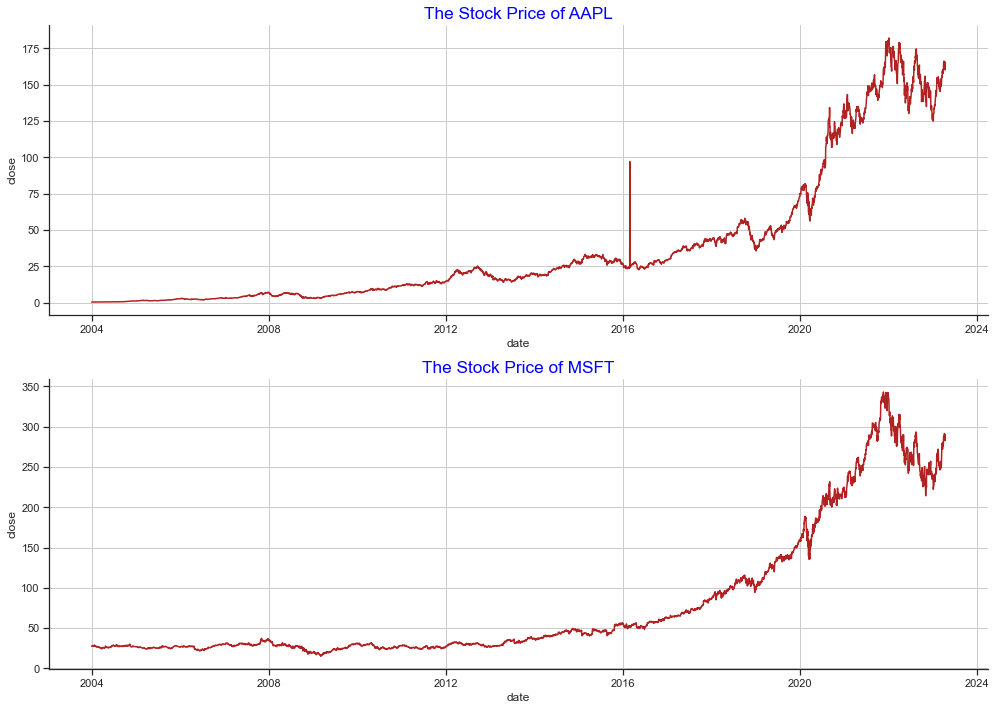

In [10]:
stock_list = ["AAPL", "MSFT"]
nrows = len(stock_list)
fig, axs = plt.subplots(figsize=(14,int(nrows*5)), nrows=nrows)
sns.set(style="ticks")
sns.despine()
for i, stock in enumerate(stock_list):
    df = pd.read_csv(f"./data/{stock}.csv")
    assert "date" in df.columns, f"date column is not in {stock}"
    assert "close" in df.columns, f"close column is not in {stock}"

    df["date"] = pd.to_datetime(df['date'])
    sns.lineplot(data=df,x="date",y='close',color='firebrick', ax=axs[i])
    axs[i].set_title(f"The Stock Price of {stock}",size='x-large',color='blue')
    axs[i].grid()
plt.tight_layout(pad=1)
plt.show()

# Draw multiple stocks using plotly

In [15]:
import plotly.graph_objects as go
stock_list = ["AAPL", "MSFT"]
start_visible = [True] + [False for _ in range(len(stock_list)-1)]
stock_df_list = [pd.read_csv(f"./data/{stock}.csv") for stock in stock_list]
trace_list = [go.Scatter(name=stock,x=df["date"],y=df["close"],mode="lines",visible=vis)
              for stock, df, vis in zip(stock_list, stock_df_list, start_visible)]
fig = go.Figure(data=trace_list)

steps = []
for stock in stock_list:
    # Hide all traces
    step = dict(
                method='update',
                args=[{'visible': [True if stock in data['name'] else False for data in fig.data]},
                      {'title.text': f'The Stock Price of {stock}'}],
                label=stock
            )
    # Add step to step list
    steps.append(step)
sliders = [dict(steps=steps)]
fig.layout.sliders = sliders
fig.update_layout(title_text=f'The Stock Price of {stock_list[0]}',
                  title_x=0.5)
fig.update_xaxes(title='date')
fig.update_yaxes(title='close')
fig.show()